In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def background_remove(img):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

    # Find contour and sort by contour area
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    # Find bounding box and extract ROI
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        break
    return ROI    

In [3]:
img_path="img_1.png"
#img_path="img_2.png"
#img_path="img_3.png"
imag=background_remove(img_path)

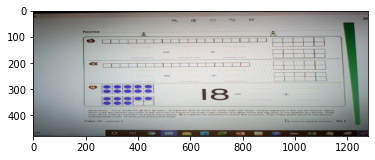

In [5]:
plt.imshow(imag)
plt.show()